In [1]:
#Change directory to data location
import os
path = 'E:\Daily Reanalisis ERA 5 v2'
os.chdir(path)

In [2]:
import warnings
warnings.simplefilter('ignore') #ignores simple warning

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tk
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import xarray as xr
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [4]:
#Topography data
#https://ldas.gsfc.nasa.gov/gldas/elevation
topo = xr.open_dataset('E:\Data\GLDASp5_elevation_025d.nc4')
topo = topo.sel(lat= slice(-10,40), lon=slice(90,130))
lattopo = topo.variables['lat'].values
lontopo = topo.variables['lon'].values

In [5]:
#Color setting
terrain =cm.get_cmap('terrain', 100)
terrain =terrain(np.linspace(0,1,100))
terrainland =terrain[20:,:]
newcolors = np.vstack((terrainland))
newcmp = ListedColormap(newcolors, name='cww')

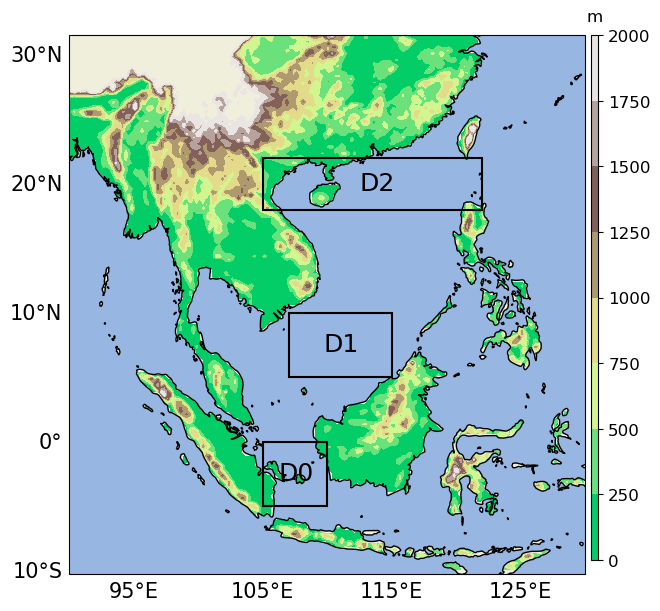

In [6]:
#Plot Map
fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 130, -10, 30])
gl=ax.gridlines(draw_labels=True,linewidth=0)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}
gl.xlocator = tk.FixedLocator(np.arange(95,126,10))
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0)

topograf=ax.contourf(lontopo, lattopo, topo['GLDAS_elevation'][0], transform=ccrs.PlateCarree(),
                                       cmap=newcmp,
                                       levels=np.arange(0,2001,250), linewidths=1
                                       )
ax.add_feature(cartopy.feature.COASTLINE, linewidth=1, edgecolor='k')
longitude1, latitude1 = 105, -5
longitude2, latitude2 = 110, 0

ax.add_patch(mpatches.Rectangle(xy=[longitude1, latitude1], width=longitude2-longitude1, height=latitude2-latitude1,
                                facecolor='none', edgecolor='k', linewidth=1.5,
                                transform=ccrs.PlateCarree()))

longitude1, latitude1 = 107, 5
longitude2, latitude2 = 115, 10

ax.add_patch(mpatches.Rectangle(xy=[longitude1, latitude1], width=longitude2-longitude1, height=latitude2-latitude1,
                                facecolor='none', edgecolor='k', linewidth=1.5,
                                transform=ccrs.PlateCarree()))

longitude1, latitude1 = 105, 18
longitude2, latitude2 = 122, 22

ax.add_patch(mpatches.Rectangle(xy=[longitude1, latitude1], width=longitude2-longitude1, height=latitude2-latitude1,
                                facecolor='none', edgecolor='k', linewidth=1.5,
                                transform=ccrs.PlateCarree()))

plt.text(106.2,-3,'D0',fontsize=18, fontweight='medium', c='k')
plt.text(109.7,7,'D1',fontsize=18, fontweight='medium', c='k')
plt.text(112.5,19.5,'D2',fontsize=18, fontweight='medium', c='k')
cbar_ax = fig.add_axes([0.89, 0.13, 0.01, 0.75])
cbar=fig.colorbar(topograf, cax=cbar_ax, label='')
cbar.ax.set_title('m', pad=10, fontsize=12)
cbar.ax.tick_params(labelsize=12)
plt.savefig('figure_output\Fig 1.pdf', bbox_inches='tight')
plt.show()